# Análise exploratória de dados

In [2]:
from IPython.display import display, Markdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Descrição dos dados

### 1.1 Conjuntos de dados

In [3]:
df = pd.read_csv('../data/raw/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
print(df.shape)
display(Markdown(f" *9 colunas e 100000 linhas*"))

(100000, 9)


 *9 colunas e 100000 linhas*

In [6]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 17.3 MB


In [7]:
display(Markdown(f"*Numero de valores unicos para cada variavel*"))
print(f"\n{df.nunique()}")

*Numero de valores unicos para cada variavel*


gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64


### 1.2 Dicionario dos dados

In [4]:
dict = Path("../data/external/dictionary.csv", index = False)
dicionario = pd.read_csv(dict, sep=',')
dicionario

,variavel,descricao,tipo,subtipo
0,gender,Indica o genêro do paciente,qualitativa,nominal
1,age,Indica a idade do paciente,quantitativa,discreta
2,hypertension,Indica se o paciente possui hipertensão,quantitativa,discreta
3,heart_disease,Indica se o pacinete possui doença no coração,quantitativa,discreta
4,smoking_history,Indica informações sobre o historico de fumant...,qualitativa,nominal
5,bmi,Indica o valor do IMC(Indice de Massa Corporal...,quantitativa,continua
6,HbA1c_level,Indica o nivel de açucar presente no sangue do...,quantitativa,continua
7,blood_glucose_level,Indica o nivel de glicose presente no sangue d...,quantitativa,discreta
8,diabetes,Indica se o paciente possui diabetes,quantitativa,discreta


### 1.3 Dados faltantes

In [9]:
print(f"{df.isna().sum()}\n")
display(Markdown(f"*não há dados faltantes no DataSet*"))

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64



*não há dados faltantes no DataSet*

### 1.4 Distribuição dos dados

In [10]:
df.describe(include = 'all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


## 2. Perguntas de partida e hipóteses

- Existe relação entre diabetes e genero ou em hipertensão e genero ?
- O historico de fumante do paciente tem relação com a diabetes ?
- Qual a relação entre diabetes e glicose/açucar no sangue ?
- Qual a correlação entre os dados ?

### 2.1 Existe relação entre diabetes e genero ou em hipertensão e genero ?

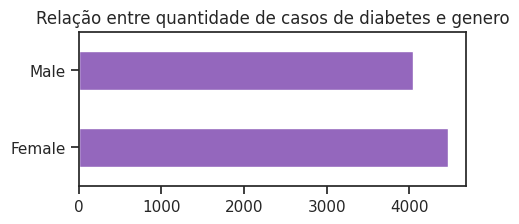

Diabetes por gênero:
Female    4461
Male      4039
Name: gender, dtype: int64



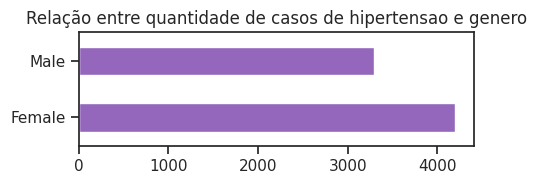

Hipertensão por gênero:
Female    4197
Male      3288
Name: gender, dtype: int64



In [246]:
#CRIANDO GRAFICO Relação entre quantiade de casos de diabetes e genero
plt.figure(figsize=(5, 2))
#SOMANDO OS BOOLEANOS E FILTRANDO POR GENERO
diabetes_por_genero = df[df['diabetes'] == True]['gender'].value_counts()
plt.title('Relação entre quantidade de casos de diabetes e genero')
diabetes_por_genero.plot(kind='barh', color=["#9467bd"])
plt.show()
print(f"Diabetes por gênero:\n{diabetes_por_genero}\n")

#CRIANDO GRAFICO Relação entre quantidade de casos de hipertensao e genero
plt.figure(figsize=(5, 2))
#SOMANDO OS BOOLEANOS E FILTRANDO POR GENERO
hipertensao_por_genero = df[df['hypertension'] == True]['gender'].value_counts()
plt.title('Relação entre quantidade de casos de hipertensao e genero')
hipertensao_por_genero.plot(kind='barh', color=["#9467bd"])
plt.tight_layout()
plt.show()
print(f"Hipertensão por gênero:\n{hipertensao_por_genero}\n")#1f77b4'

### 2.3 - O historico de fumante do paciente tem relação com a diabetes ?

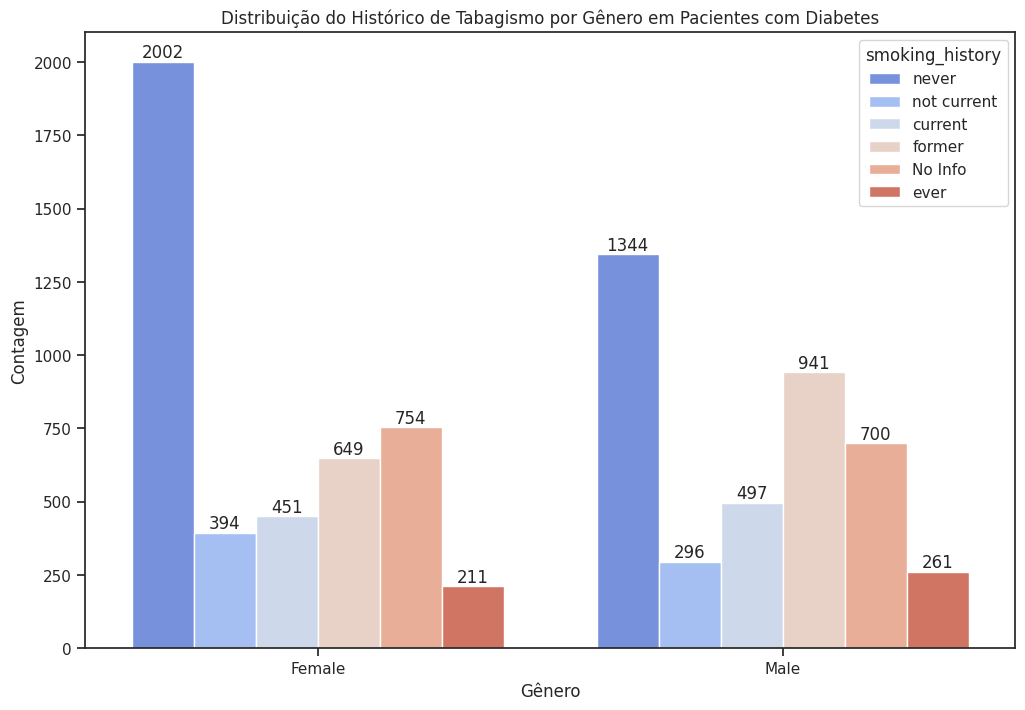

Analisando o gráfico percebemos que a relação do histórico do paciente fumante tem pouca ligação com a diabetes visto que grande maioria dos pacientes não fuma.

In [13]:
plt.figure(figsize=(12, 8))
diabetes_df = df[df['diabetes'] == True]
ax = sns.countplot(data=diabetes_df, x='gender', hue='smoking_history', palette='coolwarm')
smoking_history_labels = diabetes_df['smoking_history'].unique()

#ADICIONA OS NUMEROS NAS BARRAS 
for x in ax.patches:
    height = x.get_height()
    ax.text(x.get_x() + x.get_width() / 2., height, f'{int(height)}', 
            ha='center', va='bottom')

plt.title('Distribuição do Histórico de Tabagismo por Gênero em Pacientes com Diabetes')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()
display(Markdown(f"Analisando o gráfico percebemos que a relação do histórico do paciente fumante tem pouca ligação com a diabetes visto que grande maioria dos pacientes não fuma."))

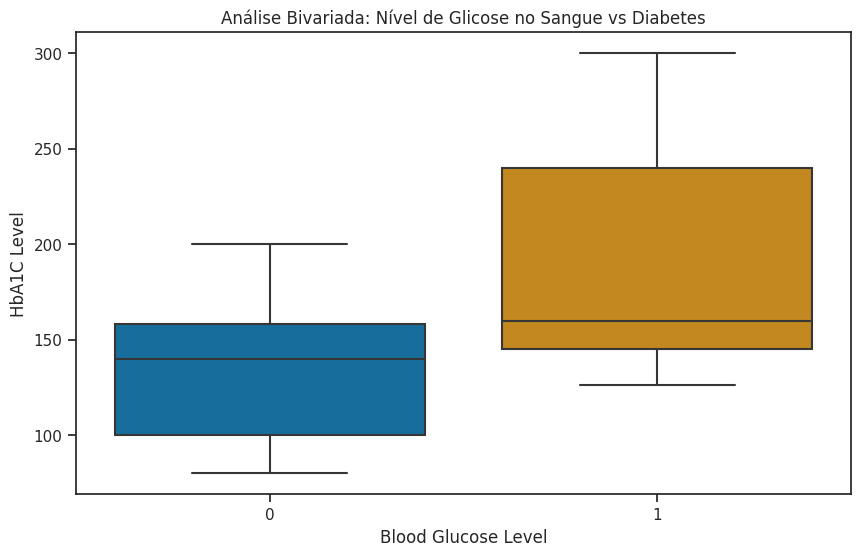

In [21]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'diabetes', y = 'blood_glucose_level', palette = 'colorblind')
plt.title("Análise Bivariada: Nível de Glicose no Sangue vs Diabetes")
plt.xlabel("Blood Glucose Level")
plt.ylabel("HbA1C Level")
plt.show()

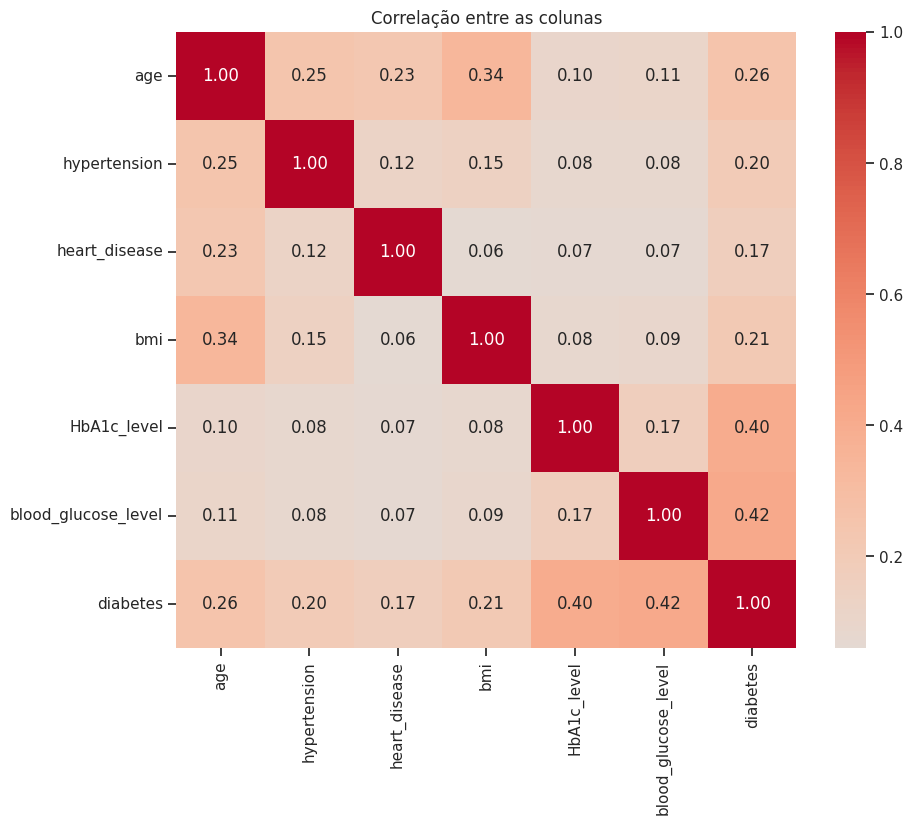

In [5]:
df_numeric = df.select_dtypes(include=[np.number])
correlacao = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm',center = 0, fmt=".2f")
plt.title('Correlação entre as colunas')
plt.show()

## 3. Insights

- Apesar de termos mais mulheres diabéticas do que homens diabéticos proporcionalmente, temos 7,61% de mulheres diabéticas e 9,75% de homens diabéticos.
- Com a distribuição do histórico de tabagismo por gênero em pacientes com diabetes, percebemos que homens tendem a fumar mais do que mulheres e que há pouca relação com a diabetes, visto que a maioria dos pacientes diabéticos nunca fumou.
- Os maiores índices de correlação com a diabetes são, respectivamente, blood_glucose_level com 42% e HbA1c_level com 40%.
- Os menores índices de correlação com a diabetes são, respectivamente, heart_disease com 17% e hypertension com 20%.
- Com o gráfico de 'Análise Bivariada: Nível de Glicose no Sangue vs Diabetes', percebemos que, quanto maior o nível de açúcar no sangue, maior a chance de o paciente ter diabetes.